In [ ]:
pip install tensorflow==2.7.0

     |████████████████████████████████| 489.6 MB 21 kB/s 
     |████████████████████████████████| 1.3 MB 47.0 MB/s 
     |████████████████████████████████| 463 kB 57.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0


In [ ]:
pip install tensorflow-quantum

     |████████████████████████████████| 10.5 MB 4.5 MB/s 
     |████████████████████████████████| 541 kB 11.4 MB/s 
     |████████████████████████████████| 90 kB 4.6 MB/s 
     |████████████████████████████████| 6.1 MB 44.5 MB/s 
     |████████████████████████████████| 1.8 MB 38.7 MB/s 
     |████████████████████████████████| 100 kB 8.8 MB/s 
     |████████████████████████████████| 90 kB 7.4 MB/s 
     |████████████████████████████████| 93 kB 1.6 MB/s 
     |████████████████████████████████| 93 kB 243 kB/s 
     |████████████████████████████████| 93 kB 566 kB/s 
     |████████████████████████████████| 93 kB 1.4 MB/s 
     |████████████████████████████████| 93 kB 1.3 MB/s 
     |████████████████████████████████| 93 kB 818 kB/s 
     |████████████████████████████████| 93 kB 1.2 MB/s 
     |████████████████████████████████| 93 kB 791 kB/s 
     |████████████████████████████████| 92 kB 1.1 MB/s 
     |████████████████████████████████| 93 kB 1.3 MB/s 
     |████████████████████████████████|

# **Task IV : Quantum Generative Adversarial Network (QGAN) Part**
### Problem statement 
You will explore how best to apply a quantum generative adversarial network (QGAN) to solve a High Energy Data analysis issue, more specifically, separating the signal events from the background events. You should use the Google Cirq and Tensorflow Quantum (TFQ) libraries for this task.Be sure to show that you understand how to fine tune your machine learning model to improve the performance. The performance can be evaluated with classification accuracy or Area Under ROC Curve (AUC).
### Dataset
A set of input samples (simulated with Delphes) is provided in NumPy NPZ format. In the input file, there are only 100 samples for training and 100 samples for testing so it won’t take much computing resources to accomplish this
task. The signal events are labeled with 1 while the background events are labeled with 0.
### **QGANs**
GANs is a powerful architecture from deep learning mostly used for data(images, text) regeneration tasks. The goal of GANs is to simultaneously train two functions: a generator G, and a discriminator D, through an adversarial learning strategy.The optimal point at the  end of algorithn occurs at a specific phenomenon called as '*Nash Equilibrium*'. The endpoint of the game, with the generator finding the correct statistics and the discriminator
unable to tell the difference between true data and the
generated data, is the unique Nash equilibrium[3].But this generative adverserial learning routines assume that the generator and discriminator have infinte capacity, which may not be possible to model classically everytime. Quantum Generative Adverserial Networks may be a good alternative because of higher representational feature space which is optimal for regenerative type of tasks.

## **Project Approach**
In this project, we have a dataset with data from 2 classes(1-signal events,0-background events) and it needs to be classified using a QGANs approach. In a GAN, a discrminator maximizes the probability of 'correctly' identifying the supplied data samples either as *real* or *fake*. But, here we have to classify the data into two classes, so along with the real or fake output, we will also two more outputs. These two extra outputs define the classification part of the model. The real or fake output is passed as a signal to the generator for training. For the remaining two outputs, we convert the labels from 1/0 format to 1/-1 format.<br>
if the output is [1, -1] classify as  label 0 and<br>
if the output is [-1, 1] classify as label 1
### Architecture
*Generator circuit*<br><br>
The dataset has each example with 5 features. So we use the 'angle-encoding' technique to encode the features into first 5 qubits that are passed on to the generator. The remaining 5 qubits are used for entangling procedures as well as fake data generation required for training.<br><br>
*Discrminator circuit*<br><br> 
The output from the generator is passed on to the discriminator through the first 5 qubits. The remaining 3 qubits are final output qubits out of which 1 qubit gives information about whether the data sample is real or fake. The other 2 qubits give information about the class of the data sample i.e(signal event or background event) 
<br><br>The architecture used in this project is shown below:

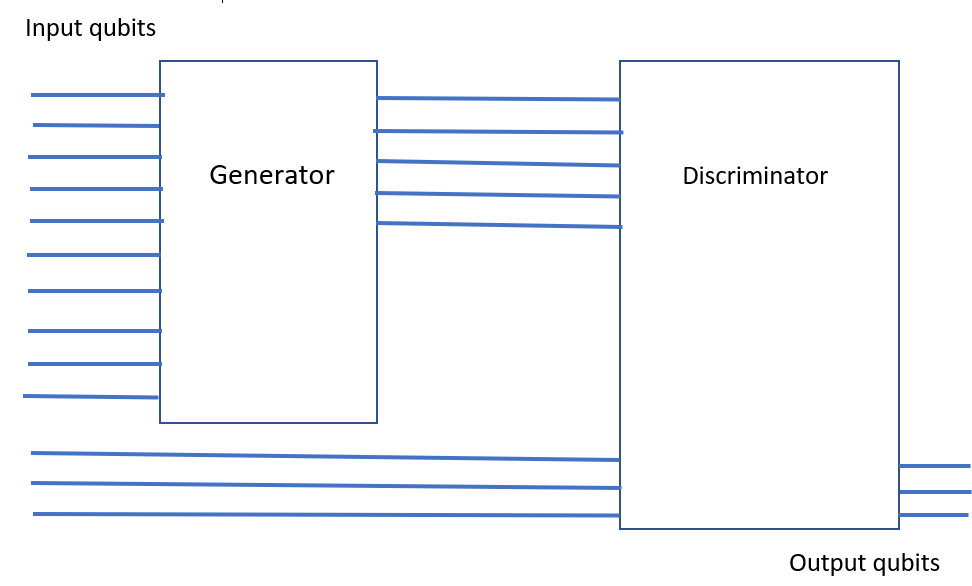
<br>
*Generator Loss*<br><br>
During generator training, only weights in the qgen will be trained, while the weights in the qdisc will be frozen
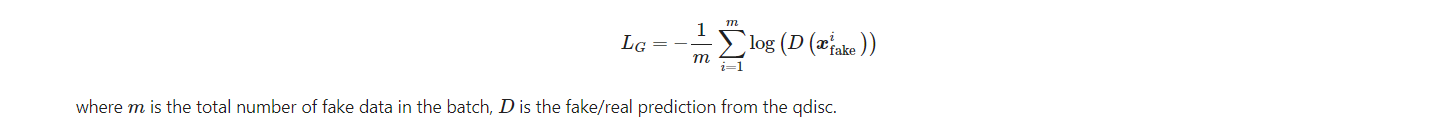
<br>
*Discriminator Loss*<br><br>
During discriminator training, only weights in the qdisc will be trained, while the weights in the qgen will be frozen. The reverse is true for generator training.
For training the discriminator, a mix of classification loss and fake/real loss will be used. The equations to calculate the loss value for one batch of training is as follow:
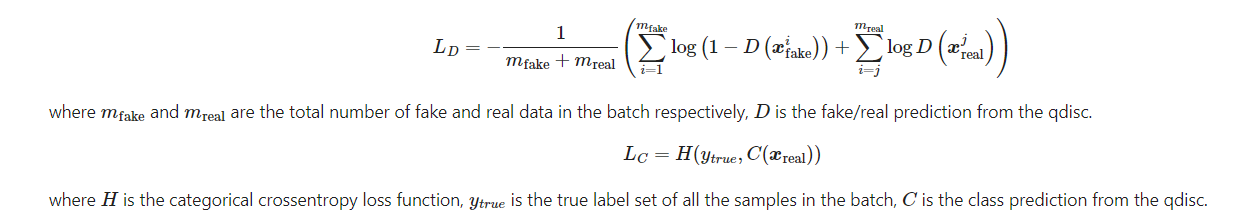
<br>
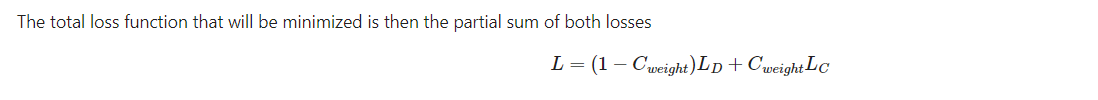
<br>
where C-weight is a hyperparameter (scalar) that needs to be tuned to control the discriminator training during the adversarial game. Higher C-weight
 means we put class prediction task as more important than fake/real prediction and vice versa.<br>
Note: when calculating the loss, all qdisc predictions are converted from 1/-1 format into 1/0 format first. So the class prediction output becomes [1, 0] for label 0 and [0, 1] for label 1, the fake/real prediction output becomes 1 for real and 0 for fake.<br>
<br><br>
These loss functions are also inspired from the reference [1].

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
import cirq
import tensorflow_quantum as tfq

%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

## **Loading and preprocessing the dataset**

In [ ]:
# from google.colab import drive 
# drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()


Saving QIS_EXAM_200Events.npz to QIS_EXAM_200Events.npz


In [ ]:
data = np.load('./QIS_EXAM_200Events.npz', allow_pickle=True)

In [ ]:
X_train=data['training_input'].item()
X_test=data['test_input'].item()

X_train_0 = X_train['0']
X_train_1 = X_train['1']
X_test_0 = X_test['0']
X_test_1 = X_test['1']

X_train = np.concatenate((X_train_0,X_train_1),axis=0)
X_test = np.concatenate((X_test_0,X_test_1),axis=0)

y_train = np.zeros((len(X_train),1))
y_train[len(X_train_0):] = 1
y_test = np.zeros((len(X_test),))
y_test[len(X_test_0):] = 1
print(X_train)

[[-0.43079088  0.86834819 -0.92614721 -0.92662029 -0.56900862]
 [ 0.33924198  0.56155499  0.93097459 -0.91631726 -0.54463516]
 [-0.42888879  0.87064961 -0.92782179 -0.77533991 -0.58329176]
 [-0.43262871  0.86128919 -0.92240878 -0.88048862 -0.49963115]
 [-0.99925345 -0.99949586  0.07753685 -0.84218034 -0.5149399 ]
 [-0.99631106 -0.99775978  0.0756427  -0.54117216 -0.66299335]
 [-0.42645921  0.87141204 -0.92908723 -0.52650143 -0.62187526]
 [ 0.34317906  0.57125045  0.92638556 -0.85113425 -0.40170562]
 [-0.99904849 -0.99933931  0.07737929 -0.81161066 -0.53550246]
 [ 0.3371327   0.55874622  0.92996976 -0.9117092  -0.50996097]
 [ 0.89649306 -0.95523176 -0.66298651 -0.71276678 -0.62698893]
 [ 0.34293232  0.56408047  0.93448436 -0.88789589 -0.56154273]
 [-0.43055876  0.86615566 -0.92532229 -0.82531102 -0.61433506]
 [ 0.33970589  0.56676702  0.92567667 -0.91562035 -0.5946945 ]
 [-0.99924224 -0.99951208  0.07752116 -0.8360764  -0.56981171]
 [-0.43099755  0.86651251 -0.925269   -0.86698757 -0.53

In [ ]:
# Checking the minimum and maximum value of the features
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

-0.9999305803064449 0.9344843617214956
-0.9997083749335067 0.934061853011746


In [ ]:
#Checking for dataset homogenity
print(np.sum(y_train==1),np.sum(y_train==0))
print(np.sum(y_test==1),np.sum(y_test==0))

50 50
50 50


In [ ]:
# Don't run this codeblock over and over again. If needed load the dataset again and then execute this once again.

y_train = tf.keras.utils.to_categorical(y_train)*2 - 1
y_test = tf.keras.utils.to_categorical(y_test)*2 -1

y_train = np.concatenate((y_train, np.ones((len(y_train), 1))), axis=1)
y_test = np.concatenate((y_test, np.ones((len(y_test), 1))), axis=1)

#check
print(y_train)
print(y_test)

[[ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]
 [-1.  1.  1.]
 [-1.  1.  1.]
 [-1.  1.  1.]
 [-1.  1.  1.]
 [-1.  1.  1.]
 [-1.  1.  1.]
 [-1.  1.  1.]
 [-1.  1.  1.]
 [-1.  1.  1.]
 [-1.  1.  1.]
 [-1.  1.  1.]
 [-1.  1.  1.]
 [-1.  1.  1.]
 [-1.  1.  1.]
 [-1.  1.  1.]
 [-1.  1.  1.]
 [-1.  1. 

## **Data Encoding**

In [ ]:
def generate_quantum_data(X,qubits):
    quantum_data =[]
    for i in X:
        circuit = cirq.Circuit()
        
        for j in range(len(i)):
            circuit.append(cirq.ry(i[j])(qubits[j]))
            
        quantum_data.append(circuit)
    return quantum_data

In [ ]:
qubits = cirq.GridQubit.rect(1, 5)
train_quantum_data = tfq.convert_to_tensor(generate_quantum_data(X_train, qubits))
test_quantum_data = tfq.convert_to_tensor(generate_quantum_data(X_test, qubits))

In [ ]:
# label 1
# print(tfq.from_tensor(train_quantum_data)[y_train[:, 0]==1][0])
def one_qubit_unitary(bit, symbols):
    """Make a Cirq circuit enacting a rotation of the bloch sphere about the X,
    Y and Z axis, that depends on the values in `symbols`.
    """
    return cirq.Circuit(
        cirq.X(bit)**symbols[0],
        cirq.Y(bit)**symbols[1],
        cirq.Z(bit)**symbols[2])


def two_qubit_unitary(bits, symbols):
    """Make a Cirq circuit that creates an arbitrary two qubit unitary."""
    circuit = cirq.Circuit()
    circuit += one_qubit_unitary(bits[0], symbols[0:3])
    circuit += one_qubit_unitary(bits[1], symbols[3:6])
    circuit += [cirq.ZZ(*bits)**symbols[6]]
    circuit += [cirq.YY(*bits)**symbols[7]]
    circuit += [cirq.XX(*bits)**symbols[8]]
    circuit += one_qubit_unitary(bits[0], symbols[9:12])
    circuit += one_qubit_unitary(bits[1], symbols[12:])
    return circuit

In [ ]:
def generator(qubits,symbols,layers=1):
  circuit = cirq.Circuit()
  data_qubits_size =int(len(qubits)/2)
  rand_rot = np.random.normal(loc=0,scale=np.pi/4,size=data_qubits_size)
  for i in range(data_qubits_size):
    circuit.append(cirq.ry(rand_rot[i])(qubits[i]))

  for layer in range(layers):
    for i in range(len(qubits)):
      circuit += one_qubit_unitary(qubits[i],symbols[3*i+3*layer*len(qubits):3*(i+1)+3*layer*len(qubits)])
  
    for i in range(len(qubits)):
      if(i<len(qubits)-1):
        circuit.append(cirq.CNOT(qubits[i],qubits[i+1]))
  
  last_unitary_symbols=symbols[-(3*data_qubits_size):]
  for i in range(data_qubits_size):
    circuit += one_qubit_unitary(qubits[i],last_unitary_symbols[3*i:3*(i+1)])
  return circuit

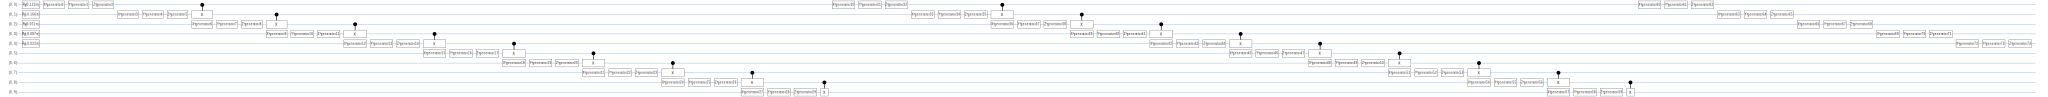

In [ ]:
import sympy
# params total: (3*features*2)*layer params + (3*features) final params
SVGCircuit(generator(cirq.GridQubit.rect(1,10),sympy.symbols('generator:75'),layers=2))

In [ ]:
def discriminator(data_qubits, output_qubits, symbols, layers =1):
  circuit = cirq.Circuit()
  for i in range(len(data_qubits)):
    circuit.append(cirq.H(data_qubits[i]))
  qubits = data_qubits+output_qubits
  for layer in range(layers):
    for i in range(len(data_qubits+output_qubits)):
      circuit += one_qubit_unitary(qubits[i],symbols[3*i + 3*layer*len(qubits) : 3*(i+1) + 3*layer*len(qubits)])
  
    for i in range(len(data_qubits+output_qubits)):
       if(i<len(data_qubits+output_qubits)-1):
         circuit.append(cirq.CNOT(qubits[i],qubits[i+1]))
  
  output_qubit_symbols = symbols[-3*(len(output_qubits)):]
  for i in range(len(output_qubits)):
    circuit += one_qubit_unitary(output_qubits[i],output_qubit_symbols[3*i:3*(i+1)])
  return circuit

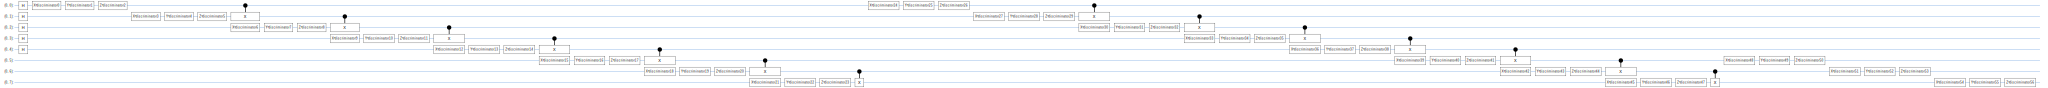

In [ ]:
disc_qubits = cirq.GridQubit.rect(1,5+3)
SVGCircuit(discriminator(disc_qubits[:5],disc_qubits[5:],sympy.symbols('discriminator:57'),layers=2))
# print(discriminator(disc_qubits[:4],disc_qubits[4:],sympy.symbols('discriminator:30')))

In [ ]:
def generator_discriminator(gen_qubits, disc_qubits,gen_symbols,disc_symbols,gen_layers=1,disc_layers=1):
  gen_disc_circuit = cirq.Circuit()
  
  gen_disc_circuit += generator(gen_qubits,gen_symbols)

  gen_disc_circuit += discriminator(disc_qubits[:5],disc_qubits[5:],disc_symbols) 

  return gen_disc_circuit

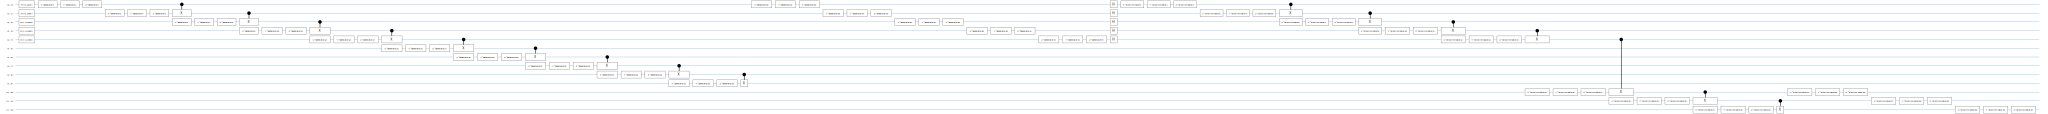

In [ ]:
gen_disc_qubits = cirq.GridQubit.rect(1,13)
gen_symbols = sympy.symbols('generator:45')
disc_symbols = sympy.symbols('discriminator:33')
SVGCircuit(generator_discriminator(gen_disc_qubits[:10],gen_disc_qubits[:5]+gen_disc_qubits[10:],gen_symbols,disc_symbols))

# **Model Parameters**


In [ ]:
num_classes = 2
features = 5
gen_layers = 4
disc_layers = 4

In [ ]:
gen_total_params = (3*features*2)*gen_layers + 3*features
disc_total_params = 3*(features+num_classes+1)*disc_layers + 3*(num_classes+1)

train_gen_symbols = sympy.symbols('generator:'+str(gen_total_params))
train_disc_symbols = sympy.symbols('discriminator:'+str(disc_total_params))

model_qubits = cirq.GridQubit.rect(1,features*2+num_classes+1)

# **Loss Functions and Performance Metrics**

# Discriminator

In [ ]:
C = 1/2
@tf.function
def disc_loss(y_true,y_pred):
  D_true = (y_true[:,2]+1)/2
  D_pred = (y_pred[:,2]+1)/2
  # D_true_size = tf.cast(tf.size(tf.where(D_true==1 ),out_type= tf.int32)) + 1e-15
 
  # Loss in predicting true or fake
  L_tf = -(tf.math.log(D_pred + 1e-15)*D_true + tf.math.log(1- D_pred +1e-15)*(1-D_true))
  L_tf = tf.reduce_mean(L_tf, axis=0)
  C_true = (y_true[:,:2]+1)/2
  C_pred = (y_pred[:,:2]+1)/2
  # Loss in classification
  D_true_size = tf.cast(tf.size(tf.where(D_true==1 ),out_type= tf.int32), dtype=tf.float32) + 1e-15
  L_c = tf.math.reduce_sum(tf.keras.losses.CategoricalCrossentropy(reduction='none')(C_true,C_pred)*D_true)/D_true_size

  # Total Loss of discrminator
  Loss = ((L_tf)*(1-C) + C*L_c)
  return Loss

In [ ]:
@tf.function
def custom_accuracy(y_true,y_pred):
  D_true = (y_true[:,2]+1)/2

  C_real_true = (y_true[:,:2]+1)/2
  C_real_pred = (y_pred[:,:2]+1)/2
  
  C_real_true = tf.math.argmax(C_real_true,axis=1)
  C_real_pred = tf.math.argmax(C_real_pred,axis=1)
  D_true_size = tf.cast(tf.size(tf.where(D_true==1 ),out_type= tf.int32), dtype=tf.float32) + 1e-15

  same = tf.cast(C_real_true == C_real_pred, tf.float32)*D_true
  return tf.math.reduce_sum(same)/D_true_size

# Generator

In [ ]:
@tf.function
def gen_loss(y_true,y_pred):
  y_pred = (y_pred+1)/2
  return tf.reduce_mean((-1)*tf.math.log(y_pred),axis=0)

# **Discriminator Model**

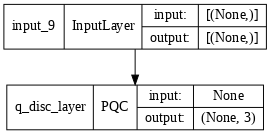

In [ ]:
def discriminator_model(disc_weights):
  disc_readout_ops = [cirq.Z(model_qubits[-1*(num_classes+1)+i]) for i in range(num_classes+1)]

  data_input = tf.keras.Input(shape = (), dtype = tf.dtypes.string)
  qdisc_layer = tfq.layers.PQC(discriminator(model_qubits[:int((len(model_qubits)-(num_classes+1))/2)],
                                  model_qubits[(len(model_qubits)-(num_classes+1)):], disc_weights,disc_layers),
                    disc_readout_ops,
                    name = 'q_disc_layer'
                    )(data_input)
  qdisc_model = tf.keras.Model(inputs = [data_input], outputs = [qdisc_layer])
  qdisc_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                      loss = [disc_loss],
                      metrics = [custom_accuracy]
                      )
  return qdisc_model

qdisc_model = discriminator_model(train_disc_symbols)
tf.keras.utils.plot_model(qdisc_model,
                          show_shapes=True,
                          show_layer_names=True,
                          dpi=70)

# **Generator Model**

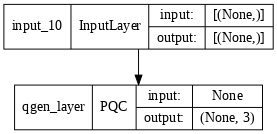

In [ ]:
def generator_model(qgen_weights,qdisc_weights):
  qgen_readout_operators = [cirq.Z(model_qubits[-1*(num_classes+1)+i]) for i in range(num_classes+1)]

  data_input = tf.keras.Input(shape = (), dtype = tf.dtypes.string)
  qgen_layer = tfq.layers.PQC(generator_discriminator(model_qubits[:features*2],model_qubits[:features]+model_qubits[len(model_qubits)-(num_classes+1):],
                              qgen_weights,qdisc_weights,
                              gen_layers,disc_layers),
                              qgen_readout_operators,name = 'qgen_layer')(data_input)

  qgen_model = tf.keras.Model(inputs=[data_input],outputs=[qgen_layer])
  qgen_model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
                     loss = [gen_loss])
  return qgen_model

qgen_model = generator_model(train_gen_symbols,qdisc_model.get_weights()[0])

tf.keras.utils.plot_model(qgen_model,
                          show_shapes=True,
                          show_layer_names=True,
                          dpi=70)

In [ ]:
# Generatting identity data for generator training in first cycle
def generate_identity_data(X):
  quantum_data=[]
  for i in X:
    circuit = cirq.Circuit()
    quantum_data.append(circuit)
  return quantum_data

In [ ]:
identity_data = tfq.convert_to_tensor(generate_identity_data(X_train))
identity_label = np.zeros((len(identity_data)),)

print(len(identity_data))
print(identity_label.shape)
print(type(generate_identity_data(X_train)[10]))

100
(100,)
<class 'cirq.circuits.circuit.Circuit'>


### Fake Data

In [ ]:
def generate_fake_data(X,qubits,symbols,layer=1):
  quantum_data=[]
  for i in X:
    quantum_data.append(generator(qubits[:2*len(i)],symbols,layer))
  
  return quantum_data

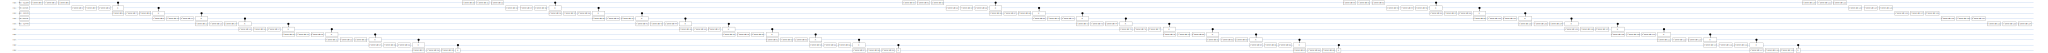

In [ ]:
fake_quantum_data = generate_fake_data(X_train,model_qubits,train_gen_symbols,gen_layers)
y_true_fake = np.zeros((len(fake_quantum_data), num_classes+1))
y_true_fake[:, 2] += (-1)
SVGCircuit(fake_quantum_data[0])

# **Training the Model**

### Model Initialization

In [ ]:
qdisc_model = discriminator_model(train_disc_symbols)
qgen_model = generator_model(train_gen_symbols,qdisc_model.get_weights()[0]) 

In [ ]:
# import h5py
import csv
from google.colab import files
uploaded = files.upload()
uploaded2 = files.upload()
uploaded3 = files.upload()
uploaded4 = files.upload()
uploaded5 = files.upload()
uploaded6 = files.upload()
uploaded7 = files.upload()
uploaded8 = files.upload()
uploaded9 = files.upload()
uploaded10 = files.upload()
# h5py.File('generator_cp_1.hdf5','w')
# h5py.File('generator_cp_2.hdf5','w')
# h5py.File('generator_cp_3.hdf5','w')
# h5py.File('generator_cp_4.hdf5','w')
# h5py.File('generator_cp_5.hdf5','w')

Saving QMLHEP_task2_checkpoints_disc_c1.csv to QMLHEP_task2_checkpoints_disc_c1.csv


Saving QMLHEP_task2_checkpoints_disc_c2.csv to QMLHEP_task2_checkpoints_disc_c2.csv


Saving QMLHEP_task2_checkpoints_disc_c3.csv to QMLHEP_task2_checkpoints_disc_c3.csv


Saving QMLHEP_task2_checkpoints_disc_c4.csv to QMLHEP_task2_checkpoints_disc_c4.csv


Saving QMLHEP_task2_checkpoints_disc_c5.csv to QMLHEP_task2_checkpoints_disc_c5.csv


Saving QMLHEP_task2_checkpoints_gen_c1.csv to QMLHEP_task2_checkpoints_gen_c1.csv


Saving QMLHEP_task2_checkpoints_gen_c2.csv to QMLHEP_task2_checkpoints_gen_c2.csv


Saving QMLHEP_task2_checkpoints_gen_c3.csv to QMLHEP_task2_checkpoints_gen_c3.csv


Saving QMLHEP_task2_checkpoints_gen_c4.csv to QMLHEP_task2_checkpoints_gen_c4.csv


Saving QMLHEP_task2_checkpoints_gen_c5.csv to QMLHEP_task2_checkpoints_gen_c5.csv


In [ ]:
def checkpoints(cycle):
    gen_model_cp = tf.keras.callbacks.ModelCheckpoint(
        filepath='./QMLHEP_task2_checkpoints_gen_c' + str(cycle)+ '.csv',
        save_weights_only=True,
        monitor='loss',
        mode='min',
        save_best_only=True)
    
    disc_model_cp = tf.keras.callbacks.ModelCheckpoint(
        filepath='./QMLHEP_task2_checkpoints_disc_c' + str(cycle) +'.csv',
        save_weights_only=True,
        monitor='custom_accuracy',
        mode='max',
        save_best_only=True)
    
    return gen_model_cp, disc_model_cp

In [ ]:
def train_qgen(epochs, batch, verbose):
    # Fit the Generator Model
    qgen_history = qgen_model.fit(x=identity_data,
                            y=identity_label,
                            batch_size=batch,
                            epochs=epochs,
                            verbose=verbose,
                            callbacks=[gen_model_cp])
    return qgen_history

In [ ]:
def train_qdisc(epochs, batch, verbose):
    # Fit the Discriminator Model
    history = qdisc_model.fit(x=train_gen_data,
                            y=y_gen_train,
                            batch_size=batch,
                            epochs=epochs,
                            verbose=verbose,
                            callbacks=[disc_model_cp],
                            validation_data=(test_gen_data, y_gen_test)
                            )
    return history

# **Adverserial Game**

### **First Cycle**

In [ ]:
best_qdisc_weights = qdisc_model.get_weights()[0]
best_qgen_weights = qgen_model.get_weights()[0]

#re-declare the generator model using the discriminator's weights
qgen_model = generator_model(train_gen_symbols, qdisc_model.get_weights()[0])

In [ ]:
gen_model_cp, disc_model_cp = checkpoints(cycle=1)

In [ ]:
H = train_qgen(1200, 100, 1)

Epoch 1/1200
1/1 [==============================] - 2s 2s/step - loss: 0.5855
Epoch 2/1200
1/1 [==============================] - 1s 1s/step - loss: 0.5854
Epoch 3/1200
1/1 [==============================] - 1s 1s/step - loss: 0.5854
Epoch 4/1200
1/1 [==============================] - 1s 1s/step - loss: 0.5854
Epoch 5/1200
1/1 [==============================] - 1s 1s/step - loss: 0.5853
Epoch 6/1200
1/1 [==============================] - 1s 1s/step - loss: 0.5853
Epoch 7/1200
1/1 [==============================] - 1s 1s/step - loss: 0.5853
Epoch 8/1200
1/1 [==============================] - 1s 1s/step - loss: 0.5852
Epoch 9/1200
1/1 [==============================] - 1s 1s/step - loss: 0.5852
Epoch 10/1200
1/1 [==============================] - 1s 1s/step - loss: 0.5852
Epoch 11/1200
1/1 [==============================] - 1s 1s/step - loss: 0.5851
Epoch 12/1200
1/1 [==============================] - 1s 1s/step - loss: 0.5851
Epoch 13/1200
1/1 [==============================] - 1s 1s/st

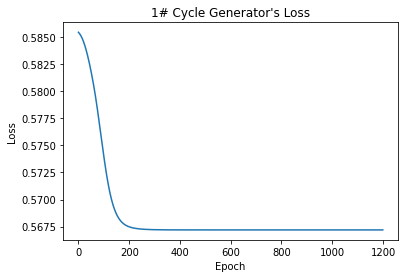

In [ ]:
plt.plot(H.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("1# Cycle Generator's Loss")
plt.show()

We can see that the loss decreases very fast and then attains a minimum value. Now, let's train the discriminator.


In [ ]:
# Generating data for discriminator by mixing real and fake data
# C = 1/2 (default value)
train_gen_data = tfq.convert_to_tensor(generate_quantum_data(X_train,model_qubits) + generate_fake_data(X_train,model_qubits,qgen_model.get_weights()[0]),gen_layers)
test_gen_data = tfq.convert_to_tensor(generate_quantum_data(X_test,model_qubits) + generate_fake_data(X_test,model_qubits,qgen_model.get_weights()[0]),gen_layers)

y_gen_train = np.concatenate((y_train, y_true_fake), axis = 0)
y_gen_test = np.concatenate((y_test, y_true_fake), axis = 0)
                            
print(len(train_gen_data), len(test_gen_data))
print(y_gen_train.shape, y_gen_test.shape)                            

200 200
(200, 3) (200, 3)


In [ ]:
# Fit the Discriminator Model
H = train_qdisc(300, 75, 1)

Epoch 1/300
3/3 [==============================] - 5s 1s/step - loss: 0.8106 - custom_accuracy: 0.6423 - val_loss: 0.6617 - val_custom_accuracy: 0.2222
Epoch 2/300
3/3 [==============================] - 4s 1s/step - loss: 0.8016 - custom_accuracy: 0.6414 - val_loss: 0.6560 - val_custom_accuracy: 0.2222
Epoch 3/300
3/3 [==============================] - 3s 1s/step - loss: 0.7861 - custom_accuracy: 0.6326 - val_loss: 0.6513 - val_custom_accuracy: 0.2222
Epoch 4/300
3/3 [==============================] - 3s 1s/step - loss: 0.7978 - custom_accuracy: 0.5573 - val_loss: 0.6468 - val_custom_accuracy: 0.2222
Epoch 5/300
3/3 [==============================] - 3s 1s/step - loss: 0.7776 - custom_accuracy: 0.5886 - val_loss: 0.6431 - val_custom_accuracy: 0.2222
Epoch 6/300
3/3 [==============================] - 3s 1s/step - loss: 0.7435 - custom_accuracy: 0.6314 - val_loss: 0.6395 - val_custom_accuracy: 0.2222
Epoch 7/300
3/3 [==============================] - 3s 1s/step - loss: 0.7328 - custom_ac

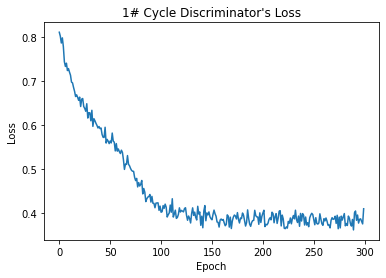

In [ ]:
plt.plot(H.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("1# Cycle Discriminator's Loss")
plt.show() 

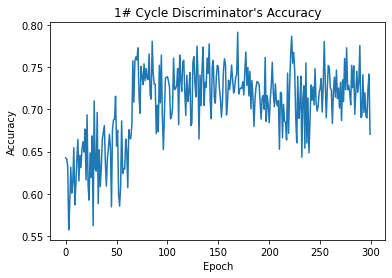

In [ ]:
plt.plot(H.history['custom_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("1# Cycle Discriminator's Accuracy")
plt.show() 

In [ ]:
custom_accuracy(np.array(y_gen_test, dtype=np.float32), qdisc_model.predict(test_gen_data))


<tf.Tensor: shape=(), dtype=float32, numpy=0.55>

### **Second Cycle**

In [ ]:
best_qdisc_weights = qdisc_model.get_weights()[0]
best_qgen_weights = qgen_model.get_weights()[0]
qgen_model = generator_model(train_gen_symbols, qdisc_model.get_weights()[0])

qgen_model.get_layer('qgen_layer').set_weights([best_qgen_weights])
qdisc_model.get_layer('q_disc_layer').set_weights([best_qdisc_weights])

In [ ]:
gen_model_cp, disc_model_cp = checkpoints(cycle=2)

In [ ]:
H = train_qgen(1000, 100, 1)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5129
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5129
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5128
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5128
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5128
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5127
Epoch 7/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5127
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5126
Epoch 9/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5126
Epoch 10/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5125
Epoch 11/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5125
Epoch 12/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5124
Epoch 13/1000
1/1 [==============================] - 1s 1s/st

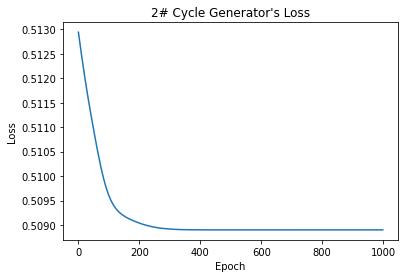

In [ ]:
plt.plot(H.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("2# Cycle Generator's Loss")
plt.show()

In [ ]:
# Generating data for discriminator by mixing real and fake data
# Increasing value of C to make the discriminator biased towards classification part 
C = 0.7
train_gen_data = tfq.convert_to_tensor(generate_quantum_data(X_train,model_qubits) + generate_fake_data(X_train,model_qubits,qgen_model.get_weights()[0]),gen_layers)
test_gen_data = tfq.convert_to_tensor(generate_quantum_data(X_test,model_qubits) + generate_fake_data(X_test,model_qubits,qgen_model.get_weights()[0]),gen_layers)

y_gen_train = np.concatenate((y_train, y_true_fake), axis = 0)
y_gen_test = np.concatenate((y_test, y_true_fake), axis = 0)
                            
print(len(train_gen_data), len(test_gen_data))
print(y_gen_train.shape, y_gen_test.shape)

200 200
(200, 3) (200, 3)


In [ ]:
H = train_qdisc(400, 90, 1)

Epoch 1/400
3/3 [==============================] - 4s 1s/step - loss: 0.4255 - custom_accuracy: 0.7302 - val_loss: 0.4459 - val_custom_accuracy: 0.4407
Epoch 2/400
3/3 [==============================] - 4s 1s/step - loss: 0.4484 - custom_accuracy: 0.7239 - val_loss: 0.4426 - val_custom_accuracy: 0.4407
Epoch 3/400
3/3 [==============================] - 4s 1s/step - loss: 0.4620 - custom_accuracy: 0.6816 - val_loss: 0.4384 - val_custom_accuracy: 0.4704
Epoch 4/400
3/3 [==============================] - 4s 1s/step - loss: 0.4293 - custom_accuracy: 0.6625 - val_loss: 0.4345 - val_custom_accuracy: 0.4667
Epoch 5/400
3/3 [==============================] - 4s 1s/step - loss: 0.4239 - custom_accuracy: 0.6709 - val_loss: 0.4309 - val_custom_accuracy: 0.5111
Epoch 6/400
3/3 [==============================] - 4s 1s/step - loss: 0.4466 - custom_accuracy: 0.7139 - val_loss: 0.4270 - val_custom_accuracy: 0.4926
Epoch 7/400
3/3 [==============================] - 4s 1s/step - loss: 0.4551 - custom_ac

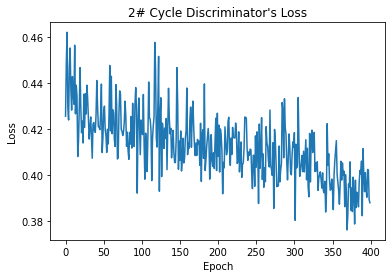

In [ ]:
plt.plot(H.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("2# Cycle Discriminator's Loss")
plt.show() 

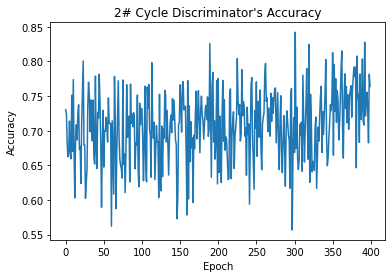

In [ ]:
plt.plot(H.history['custom_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("2# Cycle Discriminator's Accuracy")
plt.show() 

### **Third Cycle**

In [ ]:

best_qdisc_weights = qdisc_model.get_weights()[0]
best_qgen_weights = qgen_model.get_weights()[0]
qgen_model = generator_model(train_gen_symbols, qdisc_model.get_weights()[0])

qgen_model.get_layer('qgen_layer').set_weights([best_qgen_weights])
qdisc_model.get_layer('q_disc_layer').set_weights([best_qdisc_weights])

In [ ]:
gen_model_cp, disc_model_cp = checkpoints(cycle=3)

In [ ]:
H = train_qgen(700, 80, 1)

Epoch 1/700
2/2 [==============================] - 1s 197ms/step - loss: 0.5082
Epoch 2/700
2/2 [==============================] - 1s 192ms/step - loss: 0.5068
Epoch 3/700
2/2 [==============================] - 1s 191ms/step - loss: 0.5053
Epoch 4/700
2/2 [==============================] - 1s 184ms/step - loss: 0.5037
Epoch 5/700
2/2 [==============================] - 1s 204ms/step - loss: 0.5021
Epoch 6/700
2/2 [==============================] - 1s 193ms/step - loss: 0.5004
Epoch 7/700
2/2 [==============================] - 1s 201ms/step - loss: 0.4986
Epoch 8/700
2/2 [==============================] - 1s 194ms/step - loss: 0.4968
Epoch 9/700
2/2 [==============================] - 1s 188ms/step - loss: 0.4949
Epoch 10/700
2/2 [==============================] - 1s 195ms/step - loss: 0.4930
Epoch 11/700
2/2 [==============================] - 1s 204ms/step - loss: 0.4911
Epoch 12/700
2/2 [==============================] - 1s 193ms/step - loss: 0.4891
Epoch 13/700
2/2 [===================

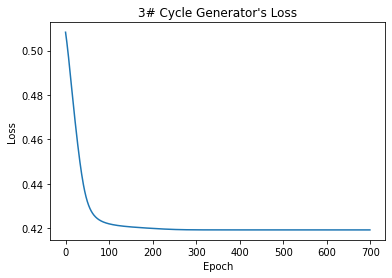

In [ ]:

plt.plot(H.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("3# Cycle Generator's Loss")
plt.show()

In [ ]:
# Generating data for discriminator by mixing real and fake data
C = 0.85
train_gen_data = tfq.convert_to_tensor(generate_quantum_data(X_train,model_qubits) + generate_fake_data(X_train,model_qubits,qgen_model.get_weights()[0]),gen_layers)
test_gen_data = tfq.convert_to_tensor(generate_quantum_data(X_test,model_qubits) + generate_fake_data(X_test,model_qubits,qgen_model.get_weights()[0]),gen_layers)

y_gen_train = np.concatenate((y_train, y_true_fake), axis = 0)
y_gen_test = np.concatenate((y_test, y_true_fake), axis = 0)
                            
print(len(train_gen_data), len(test_gen_data))
print(y_gen_train.shape, y_gen_test.shape)

200 200
(200, 3) (200, 3)


In [ ]:
H = train_qdisc(600, 100, 1)

Epoch 1/600
2/2 [==============================] - 4s 2s/step - loss: 0.5411 - custom_accuracy: 0.7316 - val_loss: 0.3340 - val_custom_accuracy: 0.3050
Epoch 2/600
2/2 [==============================] - 4s 2s/step - loss: 0.5110 - custom_accuracy: 0.7591 - val_loss: 0.3342 - val_custom_accuracy: 0.3050
Epoch 3/600
2/2 [==============================] - 4s 2s/step - loss: 0.5247 - custom_accuracy: 0.7179 - val_loss: 0.3344 - val_custom_accuracy: 0.3050
Epoch 4/600
2/2 [==============================] - 3s 2s/step - loss: 0.5253 - custom_accuracy: 0.7338 - val_loss: 0.3351 - val_custom_accuracy: 0.3050
Epoch 5/600
2/2 [==============================] - 3s 2s/step - loss: 0.5250 - custom_accuracy: 0.7379 - val_loss: 0.3357 - val_custom_accuracy: 0.3050
Epoch 6/600
2/2 [==============================] - 3s 2s/step - loss: 0.5098 - custom_accuracy: 0.7579 - val_loss: 0.3369 - val_custom_accuracy: 0.3050
Epoch 7/600
2/2 [==============================] - 3s 2s/step - loss: 0.5105 - custom_ac

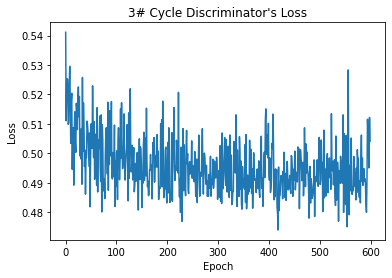

In [ ]:
plt.plot(H.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("3# Cycle Discriminator's Loss")
plt.show() 

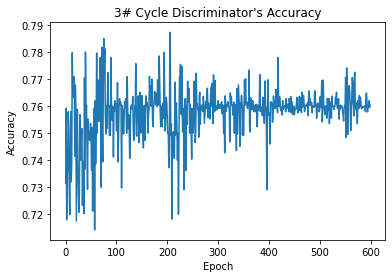

In [ ]:
plt.plot(H.history['custom_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("3# Cycle Discriminator's Accuracy")
plt.show() 

### **Fourth Cycle**

In [ ]:
best_qdisc_weights = qdisc_model.get_weights()[0]
best_qgen_weights = qgen_model.get_weights()[0]
qgen_model = generator_model(train_gen_symbols, qdisc_model.get_weights()[0])

qgen_model.get_layer('qgen_layer').set_weights([best_qgen_weights])
qdisc_model.get_layer('q_disc_layer').set_weights([best_qdisc_weights])

In [ ]:
gen_model_cp, disc_model_cp = checkpoints(cycle=4)

In [ ]:
H = train_qgen(250, 60, 1)

Epoch 1/250
2/2 [==============================] - 2s 606ms/step - loss: 0.5884
Epoch 2/250
2/2 [==============================] - 1s 518ms/step - loss: 0.5826
Epoch 3/250
2/2 [==============================] - 1s 541ms/step - loss: 0.5769
Epoch 4/250
2/2 [==============================] - 1s 517ms/step - loss: 0.5711
Epoch 5/250
2/2 [==============================] - 1s 590ms/step - loss: 0.5654
Epoch 6/250
2/2 [==============================] - 1s 588ms/step - loss: 0.5598
Epoch 7/250
2/2 [==============================] - 1s 541ms/step - loss: 0.5544
Epoch 8/250
2/2 [==============================] - 1s 569ms/step - loss: 0.5490
Epoch 9/250
2/2 [==============================] - 1s 574ms/step - loss: 0.5438
Epoch 10/250
2/2 [==============================] - 1s 527ms/step - loss: 0.5387
Epoch 11/250
2/2 [==============================] - 1s 629ms/step - loss: 0.5338
Epoch 12/250
2/2 [==============================] - 1s 598ms/step - loss: 0.5290
Epoch 13/250
2/2 [===================

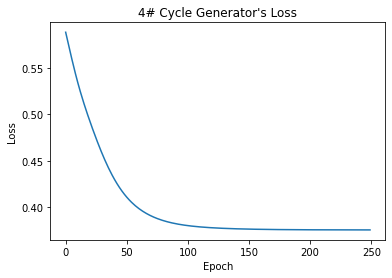

In [ ]:
plt.plot(H.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("4# Cycle Generator's Loss")
plt.show()

In [ ]:
C = 1
# Generating data for discriminator by mixing real and fake data
train_gen_data = tfq.convert_to_tensor(generate_quantum_data(X_train,model_qubits) + generate_fake_data(X_train,model_qubits,qgen_model.get_weights()[0]),gen_layers)
test_gen_data = tfq.convert_to_tensor(generate_quantum_data(X_test,model_qubits) + generate_fake_data(X_test,model_qubits,qgen_model.get_weights()[0]),gen_layers)

y_gen_train = np.concatenate((y_train, y_true_fake), axis = 0)
y_gen_test = np.concatenate((y_test, y_true_fake), axis = 0)
                            
print(len(train_gen_data), len(test_gen_data))
print(y_gen_train.shape, y_gen_test.shape)

200 200
(200, 3) (200, 3)


In [ ]:
H = train_qdisc(800, 100, 1)

Epoch 1/800
2/2 [==============================] - 4s 2s/step - loss: 0.4820 - custom_accuracy: 0.7662 - val_loss: 0.3731 - val_custom_accuracy: 0.3550
Epoch 2/800
2/2 [==============================] - 4s 2s/step - loss: 0.4857 - custom_accuracy: 0.7596 - val_loss: 0.3733 - val_custom_accuracy: 0.3550
Epoch 3/800
2/2 [==============================] - 4s 2s/step - loss: 0.4840 - custom_accuracy: 0.7611 - val_loss: 0.3737 - val_custom_accuracy: 0.3550
Epoch 4/800
2/2 [==============================] - 4s 2s/step - loss: 0.4983 - custom_accuracy: 0.7607 - val_loss: 0.3743 - val_custom_accuracy: 0.3550
Epoch 5/800
2/2 [==============================] - 4s 2s/step - loss: 0.4950 - custom_accuracy: 0.7617 - val_loss: 0.3749 - val_custom_accuracy: 0.3550
Epoch 6/800
2/2 [==============================] - 3s 2s/step - loss: 0.4910 - custom_accuracy: 0.7600 - val_loss: 0.3757 - val_custom_accuracy: 0.3550
Epoch 7/800
2/2 [==============================] - 4s 2s/step - loss: 0.4947 - custom_ac

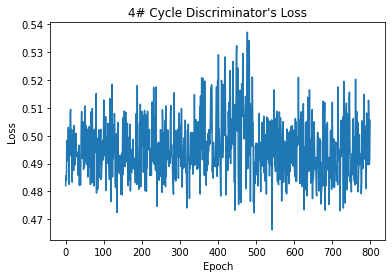

In [ ]:
plt.plot(H.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("4# Cycle Discriminator's Loss")
plt.show() 

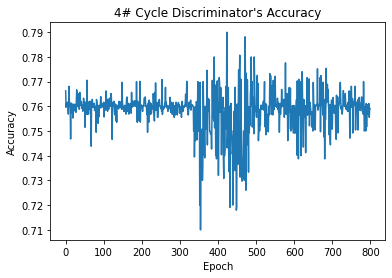

In [ ]:
plt.plot(H.history['custom_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("4# Cycle Discriminator's Accuracy")
plt.show()

### **Checking on training data**

In [ ]:
best_qdisc_weights = qdisc_model.get_weights()[0]
best_qgen_weights = qgen_model.get_weights()[0]
qgen_model = generator_model(train_gen_symbols, qdisc_model.get_weights()[0])

qgen_model.get_layer('qgen_layer').set_weights([best_qgen_weights])
qdisc_model.get_layer('q_disc_layer').set_weights([best_qdisc_weights])

In [ ]:
C=1
gen_model_cp, disc_model_cp = checkpoints(cycle=5)


In [ ]:
history = qdisc_model.fit(x=train_quantum_data,
                            y=y_train,
                            batch_size=30,
                            epochs=250,
                            verbose=1,
                            callbacks=[disc_model_cp],
                            validation_data=(test_quantum_data, y_test)
                            )

Epoch 1/250
4/4 [==============================] - 1s 311ms/step - loss: 1.2635 - custom_accuracy: 0.7000 - val_loss: 1.1602 - val_custom_accuracy: 0.7333
Epoch 2/250
4/4 [==============================] - 1s 305ms/step - loss: 1.0708 - custom_accuracy: 0.8000 - val_loss: 0.9521 - val_custom_accuracy: 0.7333
Epoch 3/250
4/4 [==============================] - 1s 295ms/step - loss: 0.8797 - custom_accuracy: 0.7500 - val_loss: 0.7852 - val_custom_accuracy: 0.7333
Epoch 4/250
4/4 [==============================] - 1s 296ms/step - loss: 0.7325 - custom_accuracy: 0.7333 - val_loss: 0.6688 - val_custom_accuracy: 0.7333
Epoch 5/250
4/4 [==============================] - 1s 296ms/step - loss: 0.6321 - custom_accuracy: 0.7333 - val_loss: 0.5911 - val_custom_accuracy: 0.7333
Epoch 6/250
4/4 [==============================] - 1s 293ms/step - loss: 0.5642 - custom_accuracy: 0.7667 - val_loss: 0.5399 - val_custom_accuracy: 0.7333
Epoch 7/250
4/4 [==============================] - 1s 297ms/step - los

In [ ]:
# Fit the Discriminator Model
#Training for another 300 epochs
history = qdisc_model.fit(x=train_quantum_data,
                          y=y_train,
                          batch_size=30,
                          epochs=300,
                          verbose=1,
                          callbacks=[disc_model_cp],
                          validation_data=(test_quantum_data, y_test)
                          )

Epoch 1/300
4/4 [==============================] - 1s 319ms/step - loss: 0.2558 - custom_accuracy: 0.7667 - val_loss: 0.2881 - val_custom_accuracy: 0.7083
Epoch 2/300
4/4 [==============================] - 1s 305ms/step - loss: 0.2556 - custom_accuracy: 0.7500 - val_loss: 0.2886 - val_custom_accuracy: 0.7083
Epoch 3/300
4/4 [==============================] - 1s 300ms/step - loss: 0.2556 - custom_accuracy: 0.7333 - val_loss: 0.2902 - val_custom_accuracy: 0.7083
Epoch 4/300
4/4 [==============================] - 1s 304ms/step - loss: 0.2558 - custom_accuracy: 0.7833 - val_loss: 0.2906 - val_custom_accuracy: 0.7083
Epoch 5/300
4/4 [==============================] - 1s 318ms/step - loss: 0.2559 - custom_accuracy: 0.7667 - val_loss: 0.2908 - val_custom_accuracy: 0.7083
Epoch 6/300
4/4 [==============================] - 1s 305ms/step - loss: 0.2559 - custom_accuracy: 0.7833 - val_loss: 0.2906 - val_custom_accuracy: 0.7083
Epoch 7/300
4/4 [==============================] - 1s 311ms/step - los

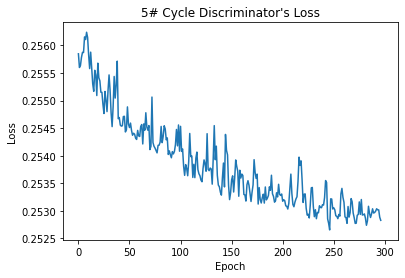

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("5# Cycle Discriminator's Loss")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# saving the model 
qdisc_model.save_weights('/content/gdrive/MyDrive/qdisc_model.h5')
qgen_model.save_weights('/content/gdrive/MyDrive/qgen_model.h5')


In [ ]:
qdisc_model.load_weights('/content/gdrive/MyDrive/qdisc_model.h5')

## **Evaluation**

In [ ]:
from sklearn.metrics import roc_auc_score

print("Training Accuracy:", custom_accuracy(np.array(y_train, dtype=np.float32), qdisc_model.predict(train_quantum_data)).numpy())
print("Testing Accuracy", custom_accuracy(np.array(y_test, dtype=np.float32), qdisc_model.predict(test_quantum_data)).numpy())

print("Training AUC:", roc_auc_score(np.argmax(((y_train+1)/2)[:, :2], axis=1), (((qdisc_model.predict(train_quantum_data)+1)/2)[:, :2])[:, 1]))
print("Testing AUC:", roc_auc_score(np.argmax(((y_test+1)/2)[:, :2], axis=1), (((qdisc_model.predict(test_quantum_data)+1)/2)[:, :2])[:, 1]))

Training Accuracy: 0.76
Testing Accuracy 0.71
Training AUC: 0.8444000000000002
Testing AUC: 0.7944


# **Results and Conclusion**



*   The above model gives reasonable performance on the training and test dataset with test accuracy=0.71 and test auc=0.79. 
*   The performance can be increased if trained using larger dataset as well using more features and consequently few more qubits(not required very high number of them because of the intrinsically high representational power.)



Other points to be noted:
*   Here, the data is encoded using angle encoding but other more sophisticated approaches like amplitude encoding can also be used.


*   The total loss function uses a biased approach formula for classification. However, I experimented with a few other loss functions to maximize classification performance such as
Total Loss of discrminator = 1/2*(Total identification loss(real or fake)/C +C(Total classification loss)) with C as the bias parameter. However, it doesn't necessarily provide any improvement.



<br>
GANs is fundamentally used for generative tasks, but here we have proved using appropriate objective functions and proper hyper-parameter tuning, it can have equally good performance on classification tasks. 






# **References**
[1] - [K. Nakaji and N. Yamamoto, “Quantum semi-supervised generative adversarial network for enhanced data classification,” Oct. 2020.](https://arxiv.org/abs/2010.13727)<br>
[2] - [P. L. Dallaire-Demers and N. Killoran, “Quantum generative adversarial networks,” Jul. 2018.](https://arxiv.org/abs/1804.08641)<br>
[3] - [Lloyd, S. & Weedbrook, C. Quantum generative adversarial learning. (2018)](https://arxiv.org/pdf/1804.09139.pdf)